IRIS-DATASET PROJECT

1.import and load files

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.shape

(150, 6)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns = ['Id'])

In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


2. Data visualization

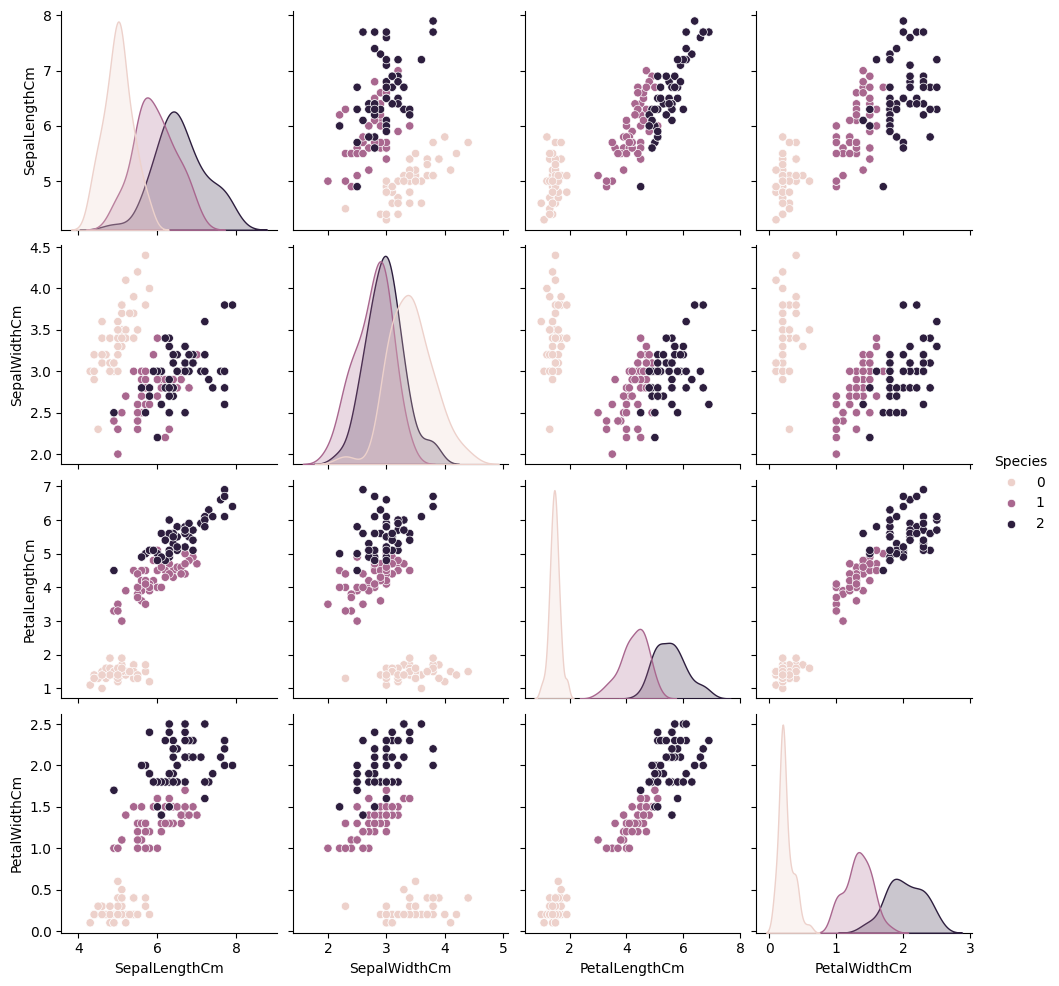

In [ ]:
sns.pairplot(df,hue="Species")

<Axes: >

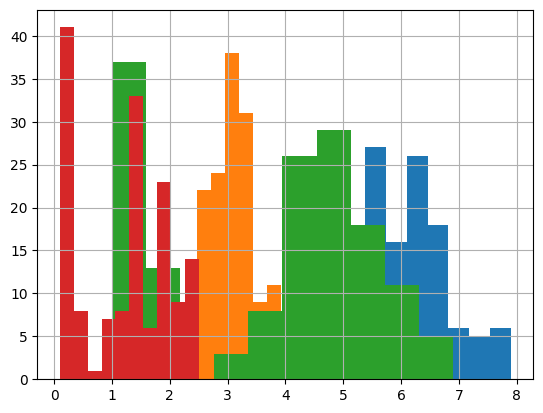

In [ ]:
#histograms
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [ ]:
colors = ['red','blue','green']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

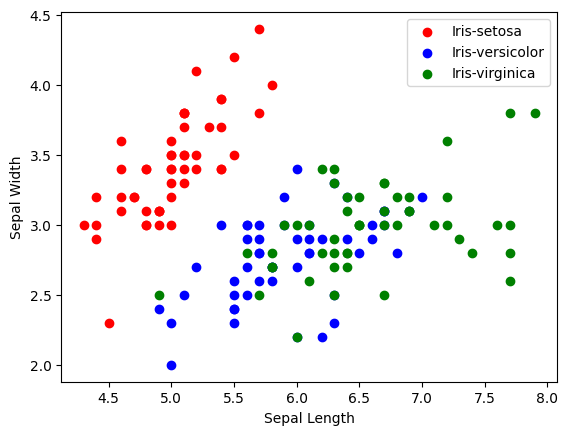

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

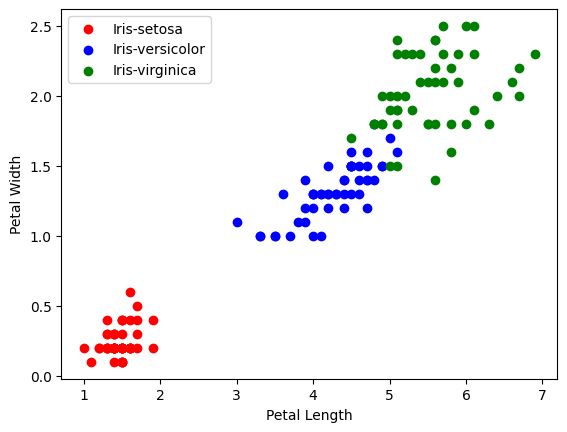

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

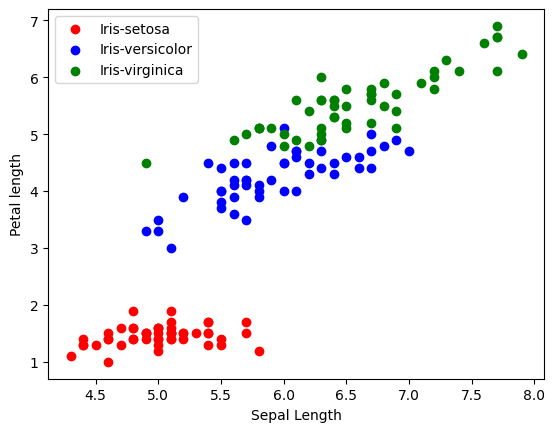

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal length")
plt.legend()

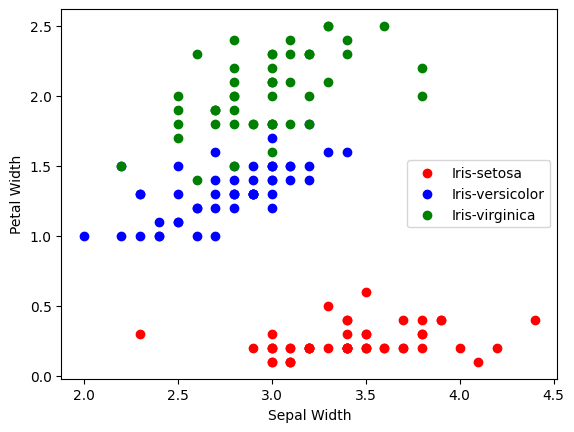

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

3.corelation metrix


In [ ]:
iris = df.drop(columns="Species")
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

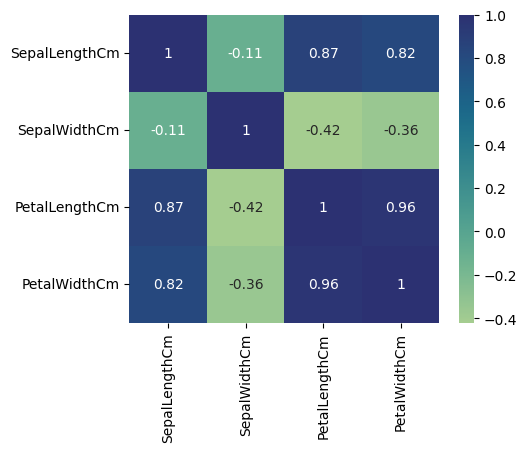

In [ ]:
corr = iris.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'crest')

4.Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


5.train test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Species'])
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

6.model training

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
mod1 = LogisticRegression()

In [ ]:
mod1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print("Accuracy: ", mod1.score(X_test,y_test))

Accuracy:  1.0


In [ ]:
y_pred = mod1.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
mod2 = KNeighborsClassifier()

In [ ]:
mod2.fit(X_train,y_train)
print("Accuracy: ", mod2.score(X_test,y_test))

Accuracy:  1.0


In [ ]:
y_pred2 = mod2.predict(X_test)
accuracy_score(y_test,y_pred2)

1.0

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
mod3 = DecisionTreeClassifier()

In [ ]:
mod3.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print("Accuracy: ",mod3.score(X_test, y_test))

Accuracy:  1.0


In [ ]:
y_pred3 = mod3.predict(X_test)
accuracy_score(y_test,y_pred3)

1.0

In [ ]:
#svm
from sklearn.svm import SVC
mod4 = SVC()
mod4.fit(X_train,y_train)

SVC()

In [ ]:
y_pred4 = mod4.predict(X_test)
print(accuracy_score(y_test,y_pred4))

1.0


In [ ]:
print("Accuracy: ", mod4.score(X_test,y_test))

Accuracy:  1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
mod5 = RandomForestClassifier()
mod5.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = mod5.predict(X_test)
print(accuracy_score(y_test,y_pred5))

1.0


In [ ]:
print("Accuracy: ", mod5.score(X_test,y_test))

Accuracy:  1.0


**Classification** **Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

